<a href="https://colab.research.google.com/github/Dzy00/CHL5230-datathon4/blob/main/Datathon_4_ST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CHL5230H (F23): Datathon 4 - Mortality Prediction Using ML
# Team Members:
#   No_7:  Son Tran

# Dataset Used:
#   Mortality ICU dataset (datathon4.csv)

# 1 File Input

In [51]:
# Upload Mortality ICU dataset (datathon4.csv)
from google.colab import files
uploaded = files.upload()

Saving datathon4.csv to datathon4 (1).csv


In [2]:
# Load the Mortality ICU dataset into a Pandas df
import pandas as pd

data = pd.read_csv('datathon4.csv')
data

encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0             66154       25312          118               0  68.0  22.730000   
1            114252       59342           81               0  77.0  27.420000   
2            119783       50777          118               0  25.0  31.950000   
3             79267       46918          118               0  81.0  22.640000   
4             92056       34377           33               0  19.0        NaN   
...             ...         ...          ...             ...   ...        ...   
91708         91592       78108           30               0  75.0  23.060250   
91709         66119       13486          121               0  56.0  47.179671   
91710          8981       58179          195               0  48.0  27.236914   
91711         33776      120598           66               0   NaN  23.297481   
91712          1671       53612          104               0  82.0  22.031250   

       elective_surgery  ethnicity gender  height  ... aids cirrhosis  \
0                     0  Caucasian      M   180.3  ...  0.0       0.0   
1                     0  Caucasian      F   160.0  ...  0.0       0.0   
2                     0  Caucasian      F   172.7  ...  0.0       0.0   
3                     1  Caucasian      F   165.1  ...  0.0       0.0   
4                     0  Caucasian      M   188.0  ...  0.0       0.0   
...                 ...        ...    ...     ...  ...  ...       ...   
91708                 0  Caucasian      M   177.8  ...  0.0       0.0   
91709                 0  Caucasian      F   183.0  ...  0.0       0.0   
91710                 0  Caucasian      M   170.2  ...  0.0       0.0   
91711                 0  Caucasian      F   154.9  ...  0.0       0.0   
91712                 1  Caucasian      F   160.0  ...  0.0       0.0   

       diabetes_mellitus hepatic_failure immunosuppression  leukemia  \
0                    1.0             0.0               0.0       0.0   
1                    1.0             0.0               0.0       0.0   
2                    0.0             0.0               0.0       0.0   
3                    0.0             0.0               0.0       0.0   
4                    0.0             0.0               0.0       0.0   
...                  ...             ...               ...       ...   
91708                1.0             0.0               0.0       0.0   
91709                0.0             0.0               0.0       0.0   
91710                1.0             0.0               0.0       0.0   
91711                0.0             0.0               0.0       0.0   
91712                0.0             0.0               0.0       0.0   

       lymphoma  solid_tumor_with_metastasis  apache_3j_bodysystem  \
0           0.0                          0.0                Sepsis   
1           0.0                          0.0           Respiratory   
2           0.0                          0.0             Metabolic   
3           0.0                          0.0        Cardiovascular   
4           0.0                          0.0                Trauma   
...         ...                          ...                   ...   
91708       0.0                          1.0                Sepsis   
91709       0.0                          0.0                Sepsis   
91710       0.0                          0.0             Metabolic   
91711       0.0                          0.0           Respiratory   
91712       0.0                          0.0      Gastrointestinal   

       apache_2_bodysystem  
0           Cardiovascular  
1              Respiratory  
2                Metabolic  
3           Cardiovascular  
4                   Trauma  
...                    ...  
91708       Cardiovascular  
91709       Cardiovascular  
91710            Metabolic  
91711          Respiratory  
91712     Gastrointestinal  

[91713 rows x 186 columns]

In [ ]:
# Checking data types
data.dtypes

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                            float64
                                ...   
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Length: 186, dtype: object

In [ ]:
# Checking number of patients
data['patient_id'].unique().shape

(91713,)

In [ ]:
# Checking for any NA values
print(data.shape)
print(data.isna().sum())

(91713, 186)
encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64


**1.1 Data Cleaning**

In [ ]:
# Delete columns with >50% NA values
data = data.loc[:, data.isna().mean() < 0.50]
print(data.shape)
print(data.isna().sum())

(91713, 112)
encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 112, dtype: int64


In [3]:
# Select variables based on redundancy/low variance/multicollinearity cutoff (>0.70)
data_selected = data[['hospital_death',
                # demographic
                # drop 'readmission_status' (no variance)
                'age','bmi','elective_surgery','ethnicity','gender','hospital_admit_source','icu_admit_source',
                'icu_stay_type','icu_type','pre_icu_los_days',
                # apache
                # drop 'bun_apache', 'creatinine_apache', 'glucose_apache', 'hematocrit_apache', 'sodium_apache', 'wbc_apache' (>0.70 collinearity w/ respective lab features)
                # drop 'heart_rate_apache', 'temp_apache' (>0.70 collinearity w/ respective vitals features)
                # drop 'apache_2_diagnosis' (redundant w/ 'apache_3j_diagnosis')
                'apache_3j_diagnosis','apache_post_operative','arf_apache',
                'gcs_eyes_apache','gcs_motor_apache','gcs_unable_apache','gcs_verbal_apache',
                'intubated_apache','map_apache','resprate_apache','ventilated_apache',
                # vitals
                # drop 'd1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min','d1_mbp_noninvasive_max','d1_mbp_noninvasive_min','h1_diasbp_noninvasive_max',
                # 'h1_diasbp_noninvasive_min','h1_mbp_noninvasive_max','h1_mbp_noninvasive_min','h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min',
                'd1_diasbp_max','d1_diasbp_min','d1_heartrate_max','d1_heartrate_min','d1_mbp_max','d1_mbp_min',
                'd1_resprate_max','d1_resprate_min','d1_spo2_max','d1_spo2_min','d1_sysbp_max','d1_sysbp_min',
                'd1_temp_max','d1_temp_min','h1_diasbp_max','h1_diasbp_min','h1_heartrate_max','h1_heartrate_min',
                'h1_mbp_max','h1_mbp_min','h1_resprate_max','h1_resprate_min','h1_spo2_max','h1_spo2_min',
                'h1_sysbp_max','h1_sysbp_min','h1_temp_max','h1_temp_min',
                # labs
                'd1_bun_max','d1_bun_min','d1_calcium_max','d1_calcium_min','d1_creatinine_max','d1_creatinine_min',
                'd1_glucose_max','d1_glucose_min','d1_hco3_max','d1_hco3_min','d1_hemaglobin_max','d1_hemaglobin_min',
                'd1_hematocrit_max','d1_hematocrit_min','d1_platelets_max','d1_platelets_min','d1_potassium_max','d1_potassium_min',
                'd1_sodium_max','d1_sodium_min','d1_wbc_max','d1_wbc_min',
                # apache comorbidity
                # drop 'apache_4a_hospital_death_prob','apache_4a_icu_death_prob'
                'aids','cirrhosis','diabetes_mellitus','hepatic_failure','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis',
                # apache grouping
                # drop 'apache_2_bodysystem' (redundant w/ 'apache_3j_bodysystem')
                'apache_3j_bodysystem']]

print(data_selected.shape)

(91713, 81)


In [4]:
# Define target, numerical and categorical features
target_column       = 'hospital_death'
categorical_columns = ['ethnicity','gender','hospital_admit_source','icu_admit_source',
                       'icu_stay_type','icu_type','apache_3j_bodysystem',
                       'elective_surgery', 'apache_post_operative', 'apache_3j_diagnosis', 'gcs_eyes_apache',
                       'gcs_motor_apache', 'gcs_verbal_apache', 'arf_apache', 'gcs_unable_apache',
                       'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis',
                       'diabetes_mellitus', 'hepatic_failure', 'immunosuppression',
                       'leukemia','lymphoma','solid_tumor_with_metastasis']
numerical_columns   = [c for c in data_selected.columns if c not in categorical_columns and c != target_column]

# Define specific feature categories based on dictionary
demographic_columns = ['age','bmi','elective_surgery','ethnicity', 'gender','hospital_admit_source','icu_admit_source',
                       'icu_stay_type','icu_type','pre_icu_los_days']
apache_cov_columns  = ['apache_2_diagnosis','apache_3j_diagnosis','apache_post_operative','arf_apache','bun_apache',
                       'creatinine_apache','gcs_eyes_apache','gcs_motor_apache','gcs_unable_apache','gcs_verbal_apache',
                       'glucose_apache','heart_rate_apache','hematocrit_apache','intubated_apache','map_apache',
                       'resprate_apache','sodium_apache','temp_apache','ventilated_apache','wbc_apache']
vitals_columns      = ['d1_diasbp_max','d1_diasbp_min','d1_heartrate_max','d1_heartrate_min','d1_mbp_max','d1_mbp_min',
                       'd1_resprate_max','d1_resprate_min','d1_spo2_max','d1_spo2_min','d1_sysbp_max','d1_sysbp_min',
                       'd1_temp_max','d1_temp_min','h1_diasbp_max','h1_diasbp_min','h1_heartrate_max','h1_heartrate_min',
                       'h1_mbp_max','h1_mbp_min','h1_resprate_max','h1_resprate_min','h1_spo2_max','h1_spo2_min',
                       'h1_sysbp_max','h1_sysbp_min','h1_temp_max','h1_temp_min']
labs_columns        = ['d1_bun_max','d1_bun_min','d1_calcium_max','d1_calcium_min','d1_creatinine_max','d1_creatinine_min',
                       'd1_glucose_max','d1_glucose_min','d1_hco3_max','d1_hco3_min','d1_hemaglobin_max','d1_hemaglobin_min',
                       'd1_hematocrit_max','d1_hematocrit_min','d1_platelets_max','d1_platelets_min','d1_potassium_max','d1_potassium_min',
                       'd1_sodium_max','d1_sodium_min','d1_wbc_max','d1_wbc_min']
apache_comb_columns = ['aids','cirrhosis','diabetes_mellitus','hepatic_failure','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis']
apache_group_columns = ['apache_3j_bodysystem']

# 2 Exploratory Data Analysis

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import plotly.express as px
import numpy as np
import warnings

warnings.filterwarnings('ignore')

**2.1 Distribution Plots**

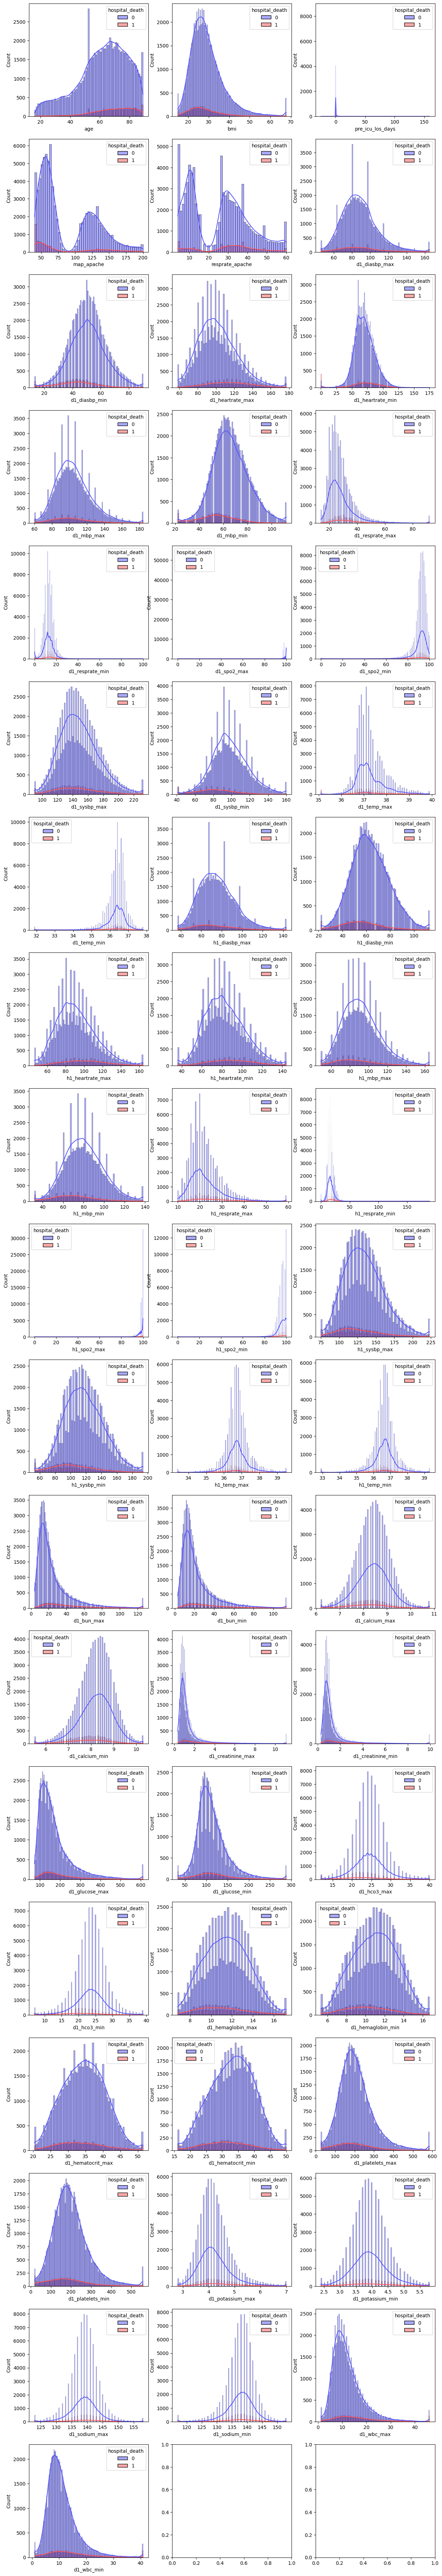

In [ ]:
# Checking the difference in distribution of numerical features in two classes

# Create a grid of subplots with 21 rows and 3 columns
fig, axs = plt.subplots(nrows = 19, ncols = 3, figsize = (15, 95))

# Loop over each feature in numerical list
for i, column in enumerate(numerical_columns):
  # Calculate the position for the subplot; x is the row index and y is the column index
  x = i // 3
  y = i % 3

  # Plot a histogram of the feature split by the 'hospital_death' class
  # kde = True adds a Kernal Density Estimate plot to smooth the histogram
  sns.histplot(data_selected, x = column, hue = 'hospital_death', kde = True, palette = 'seismic', ax = axs[x][y])

# Display all the subplots
plt.show()

**2.2 Multicollinearity Analysis**

<ipython-input-40-8fd19be52b3d>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data[demographic_columns + [target_column]].corr(), annot = True, annot_kws = {"fontsize":9})


<Axes: >

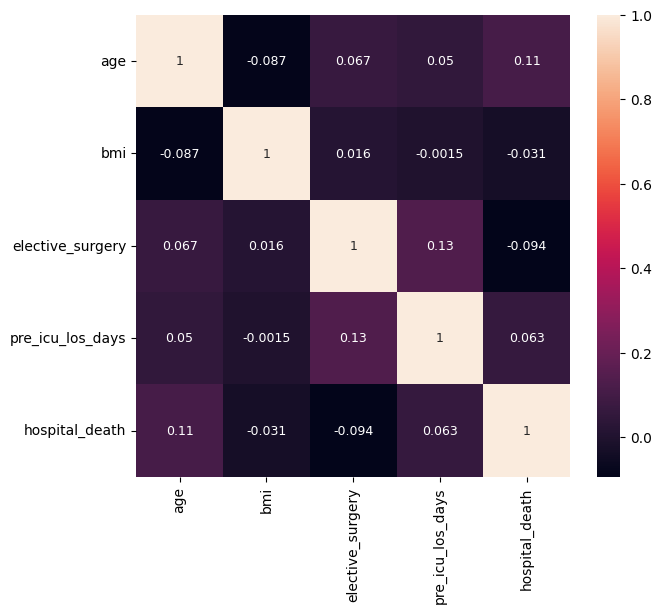

In [ ]:
# Checking for multicollinearity of features with the target class ('hospital_death')

# Patient demographics
# Plot heatmap
plt.figure(figsize = (7,6))
sns.heatmap(data[demographic_columns + [target_column]].corr(), annot = True, annot_kws = {"fontsize":9})

<Axes: >

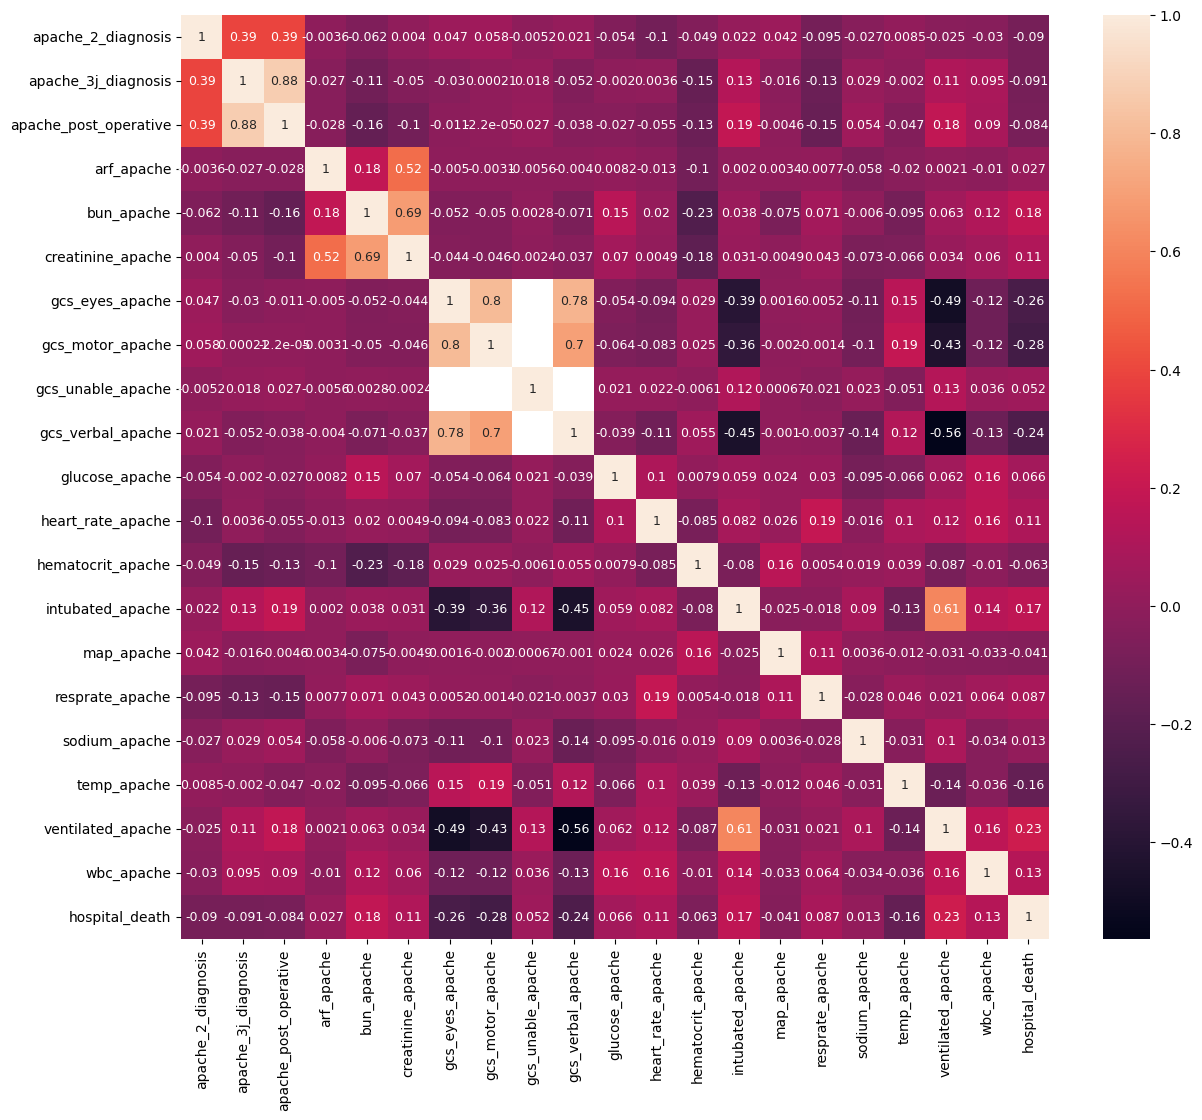

In [ ]:
# APACHE covariates
# Plot heatmap
plt.figure(figsize = (14,12))
sns.heatmap(data[apache_cov_columns + [target_column]].corr(), annot = True, annot_kws = {"fontsize":9})

<Axes: >

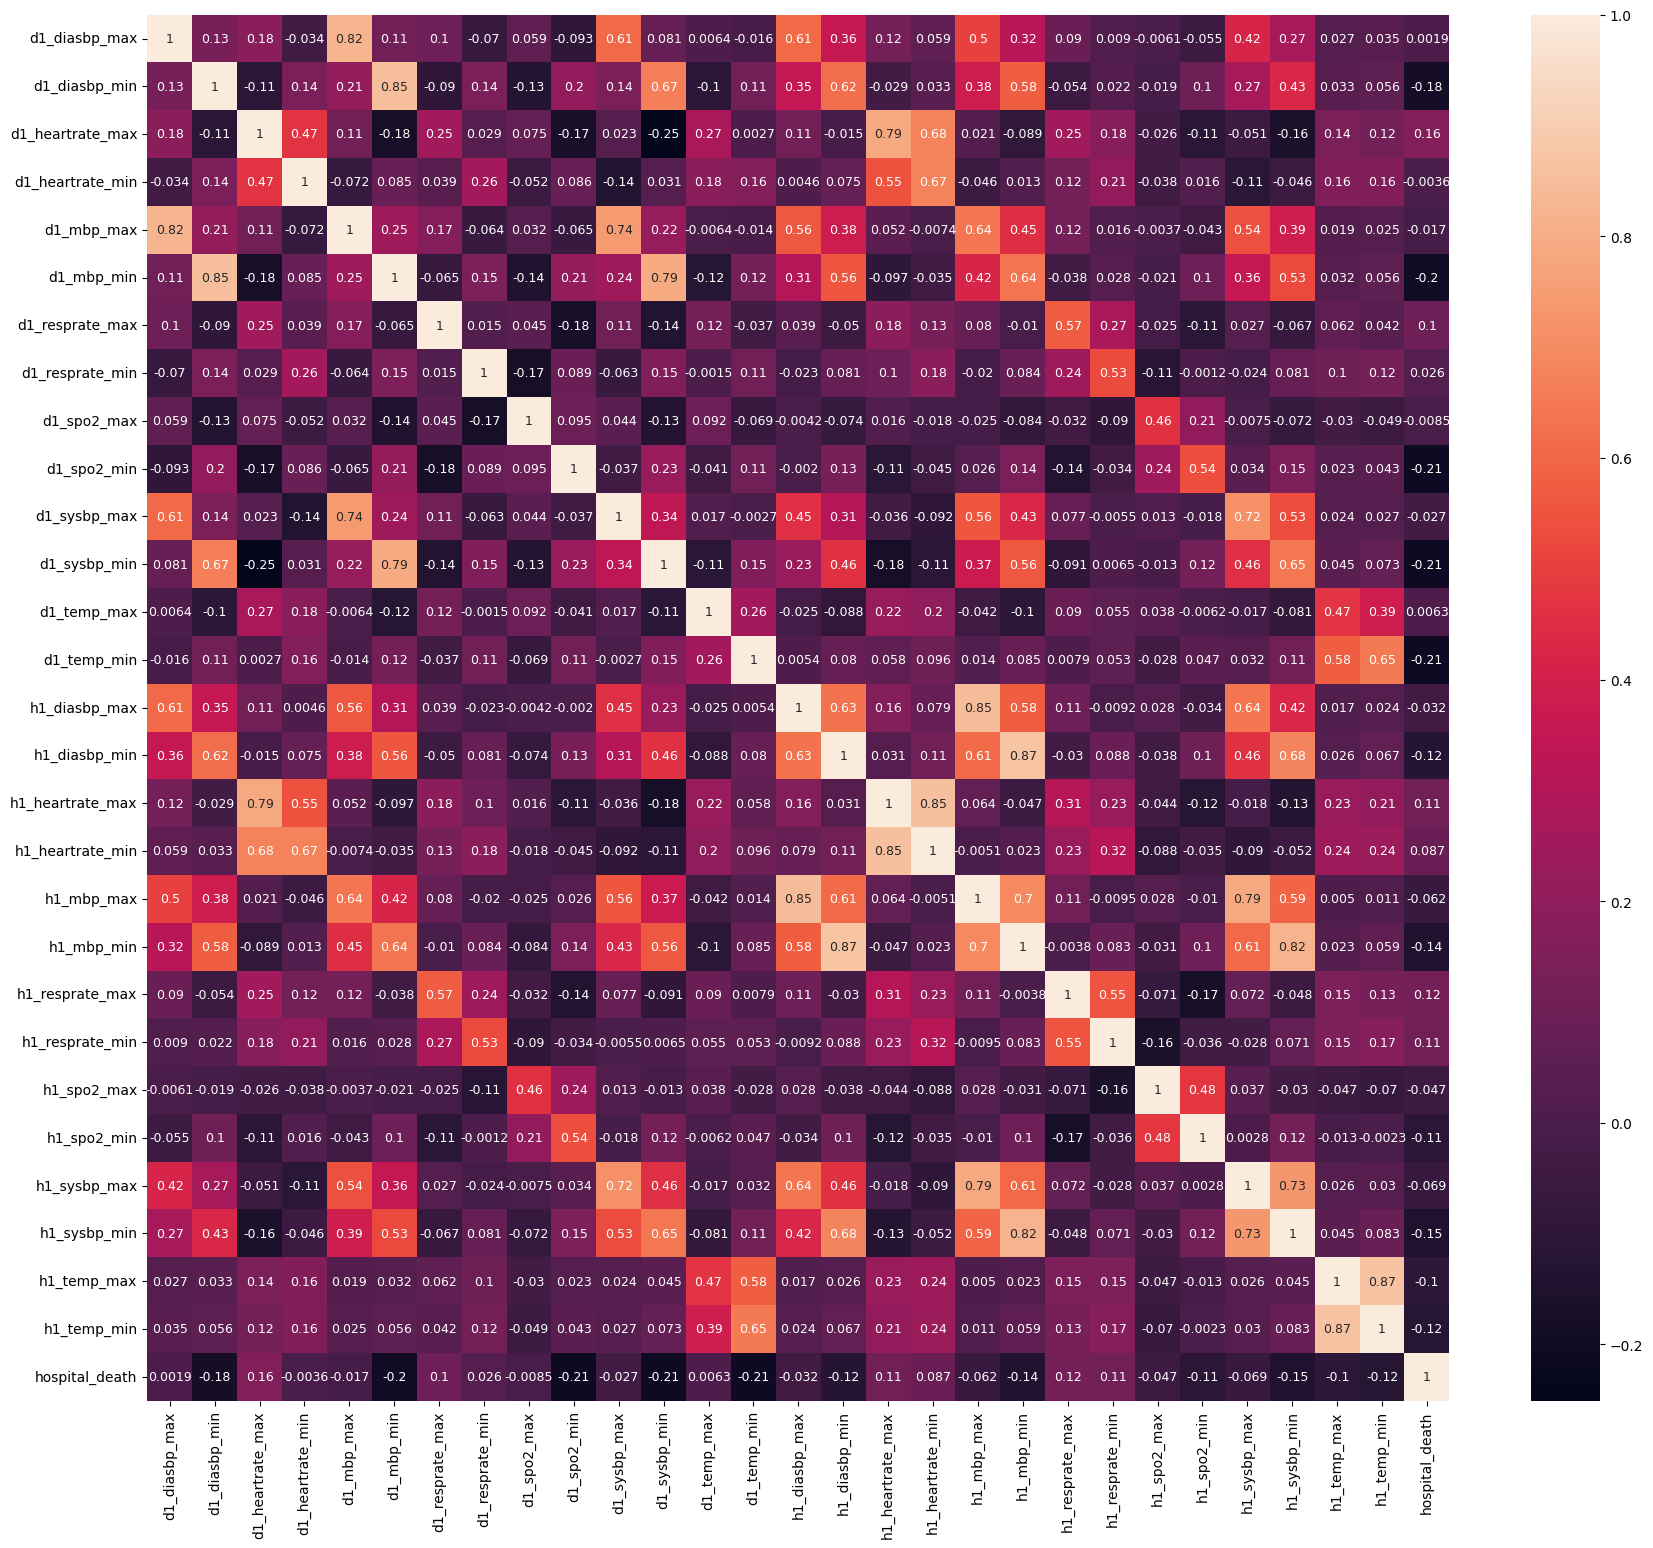

In [ ]:
# Vitals
# Plot heatmap
plt.figure(figsize = (21,18))
sns.heatmap(data[vitals_columns + [target_column]].corr(), annot = True, annot_kws = {"fontsize":9})

<Axes: >

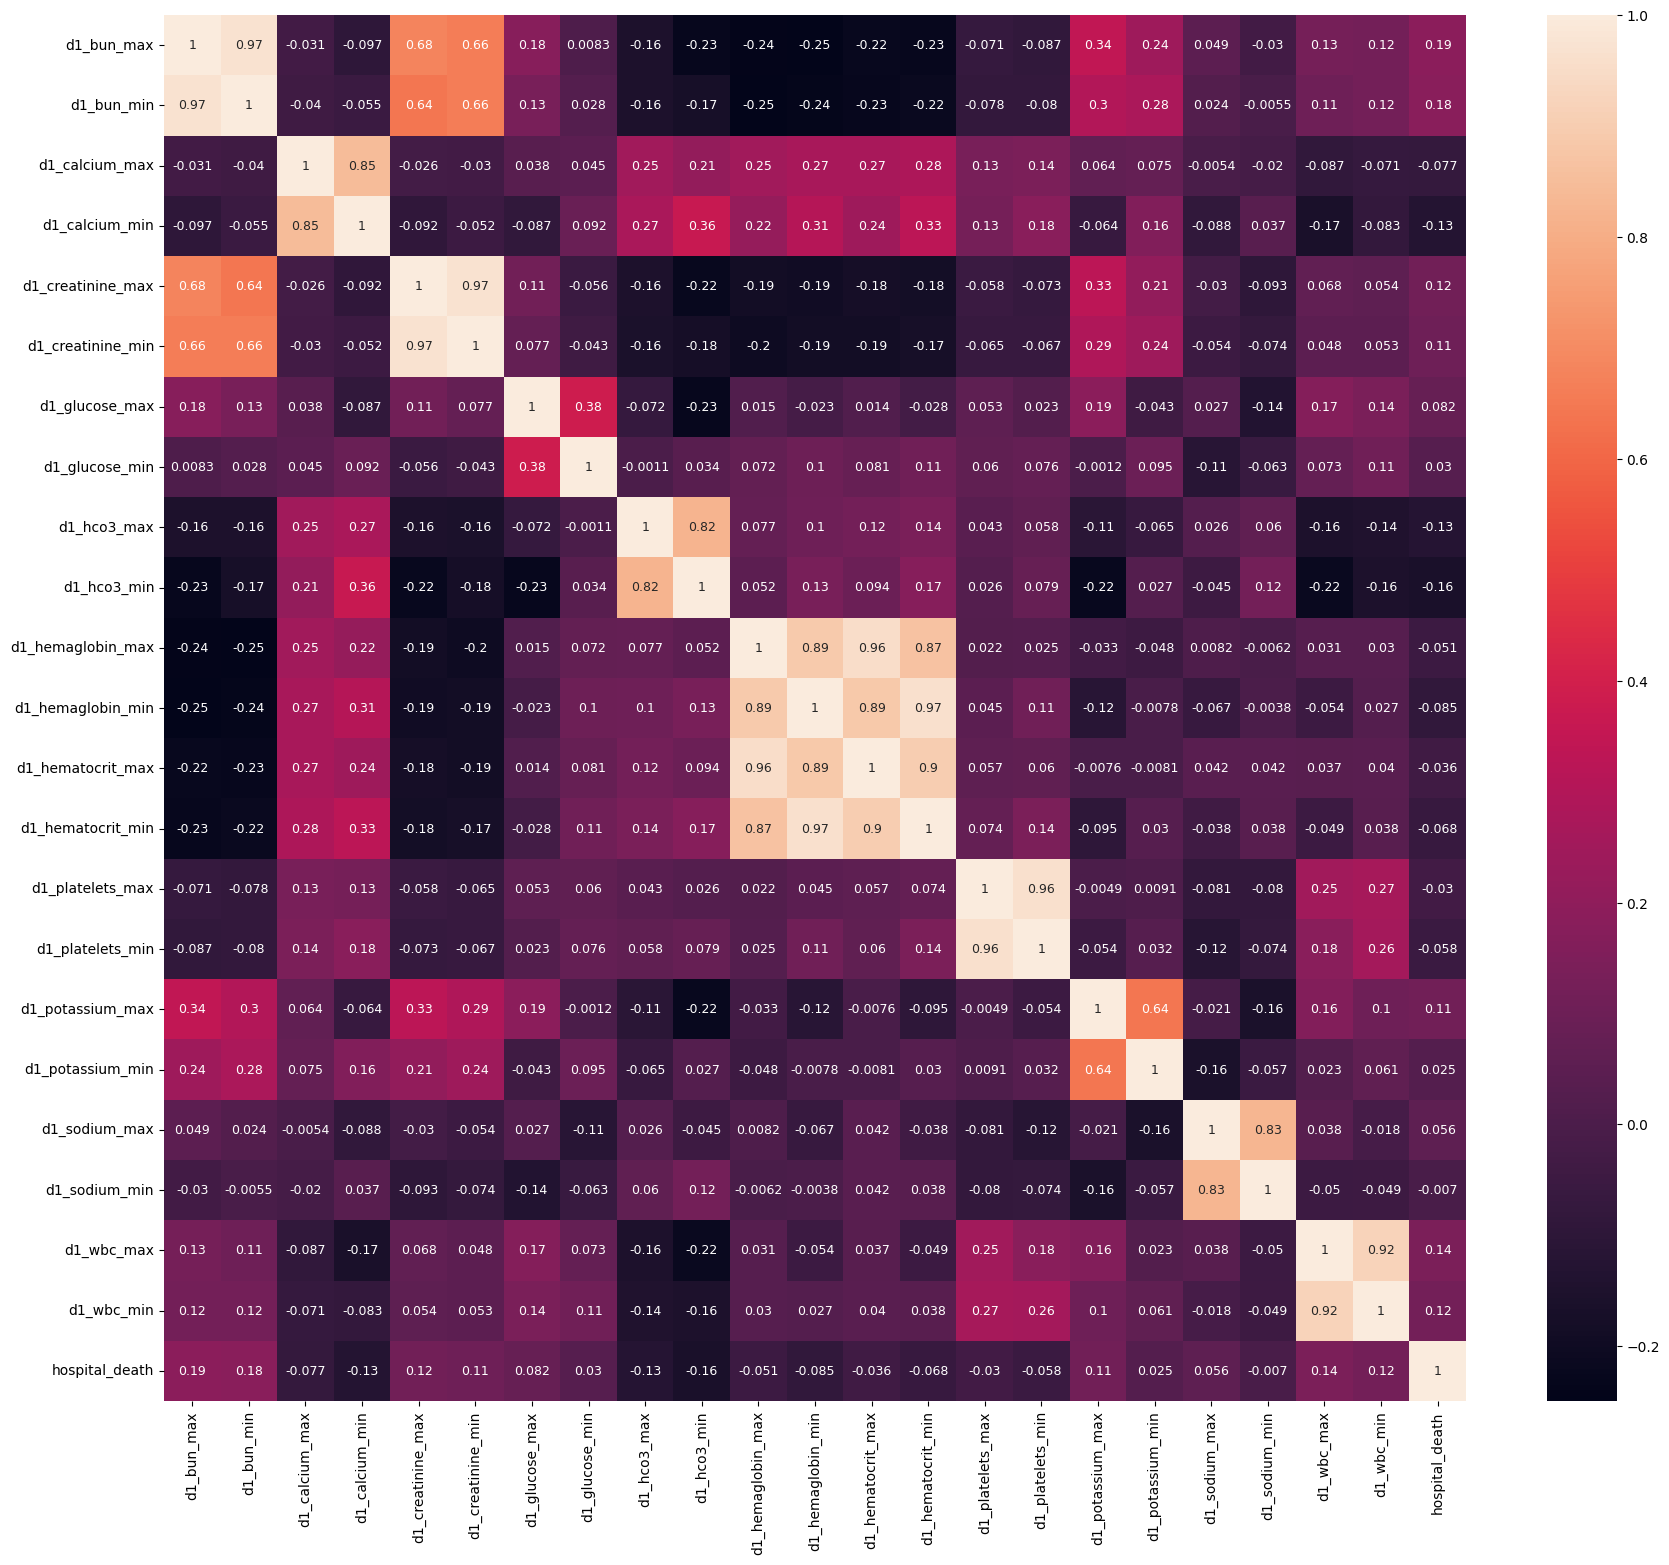

In [ ]:
# Labs
# Plot heatmap
plt.figure(figsize = (21,18))
sns.heatmap(data[labs_columns + [target_column]].corr(), annot = True, annot_kws = {"fontsize":9})

<Axes: >

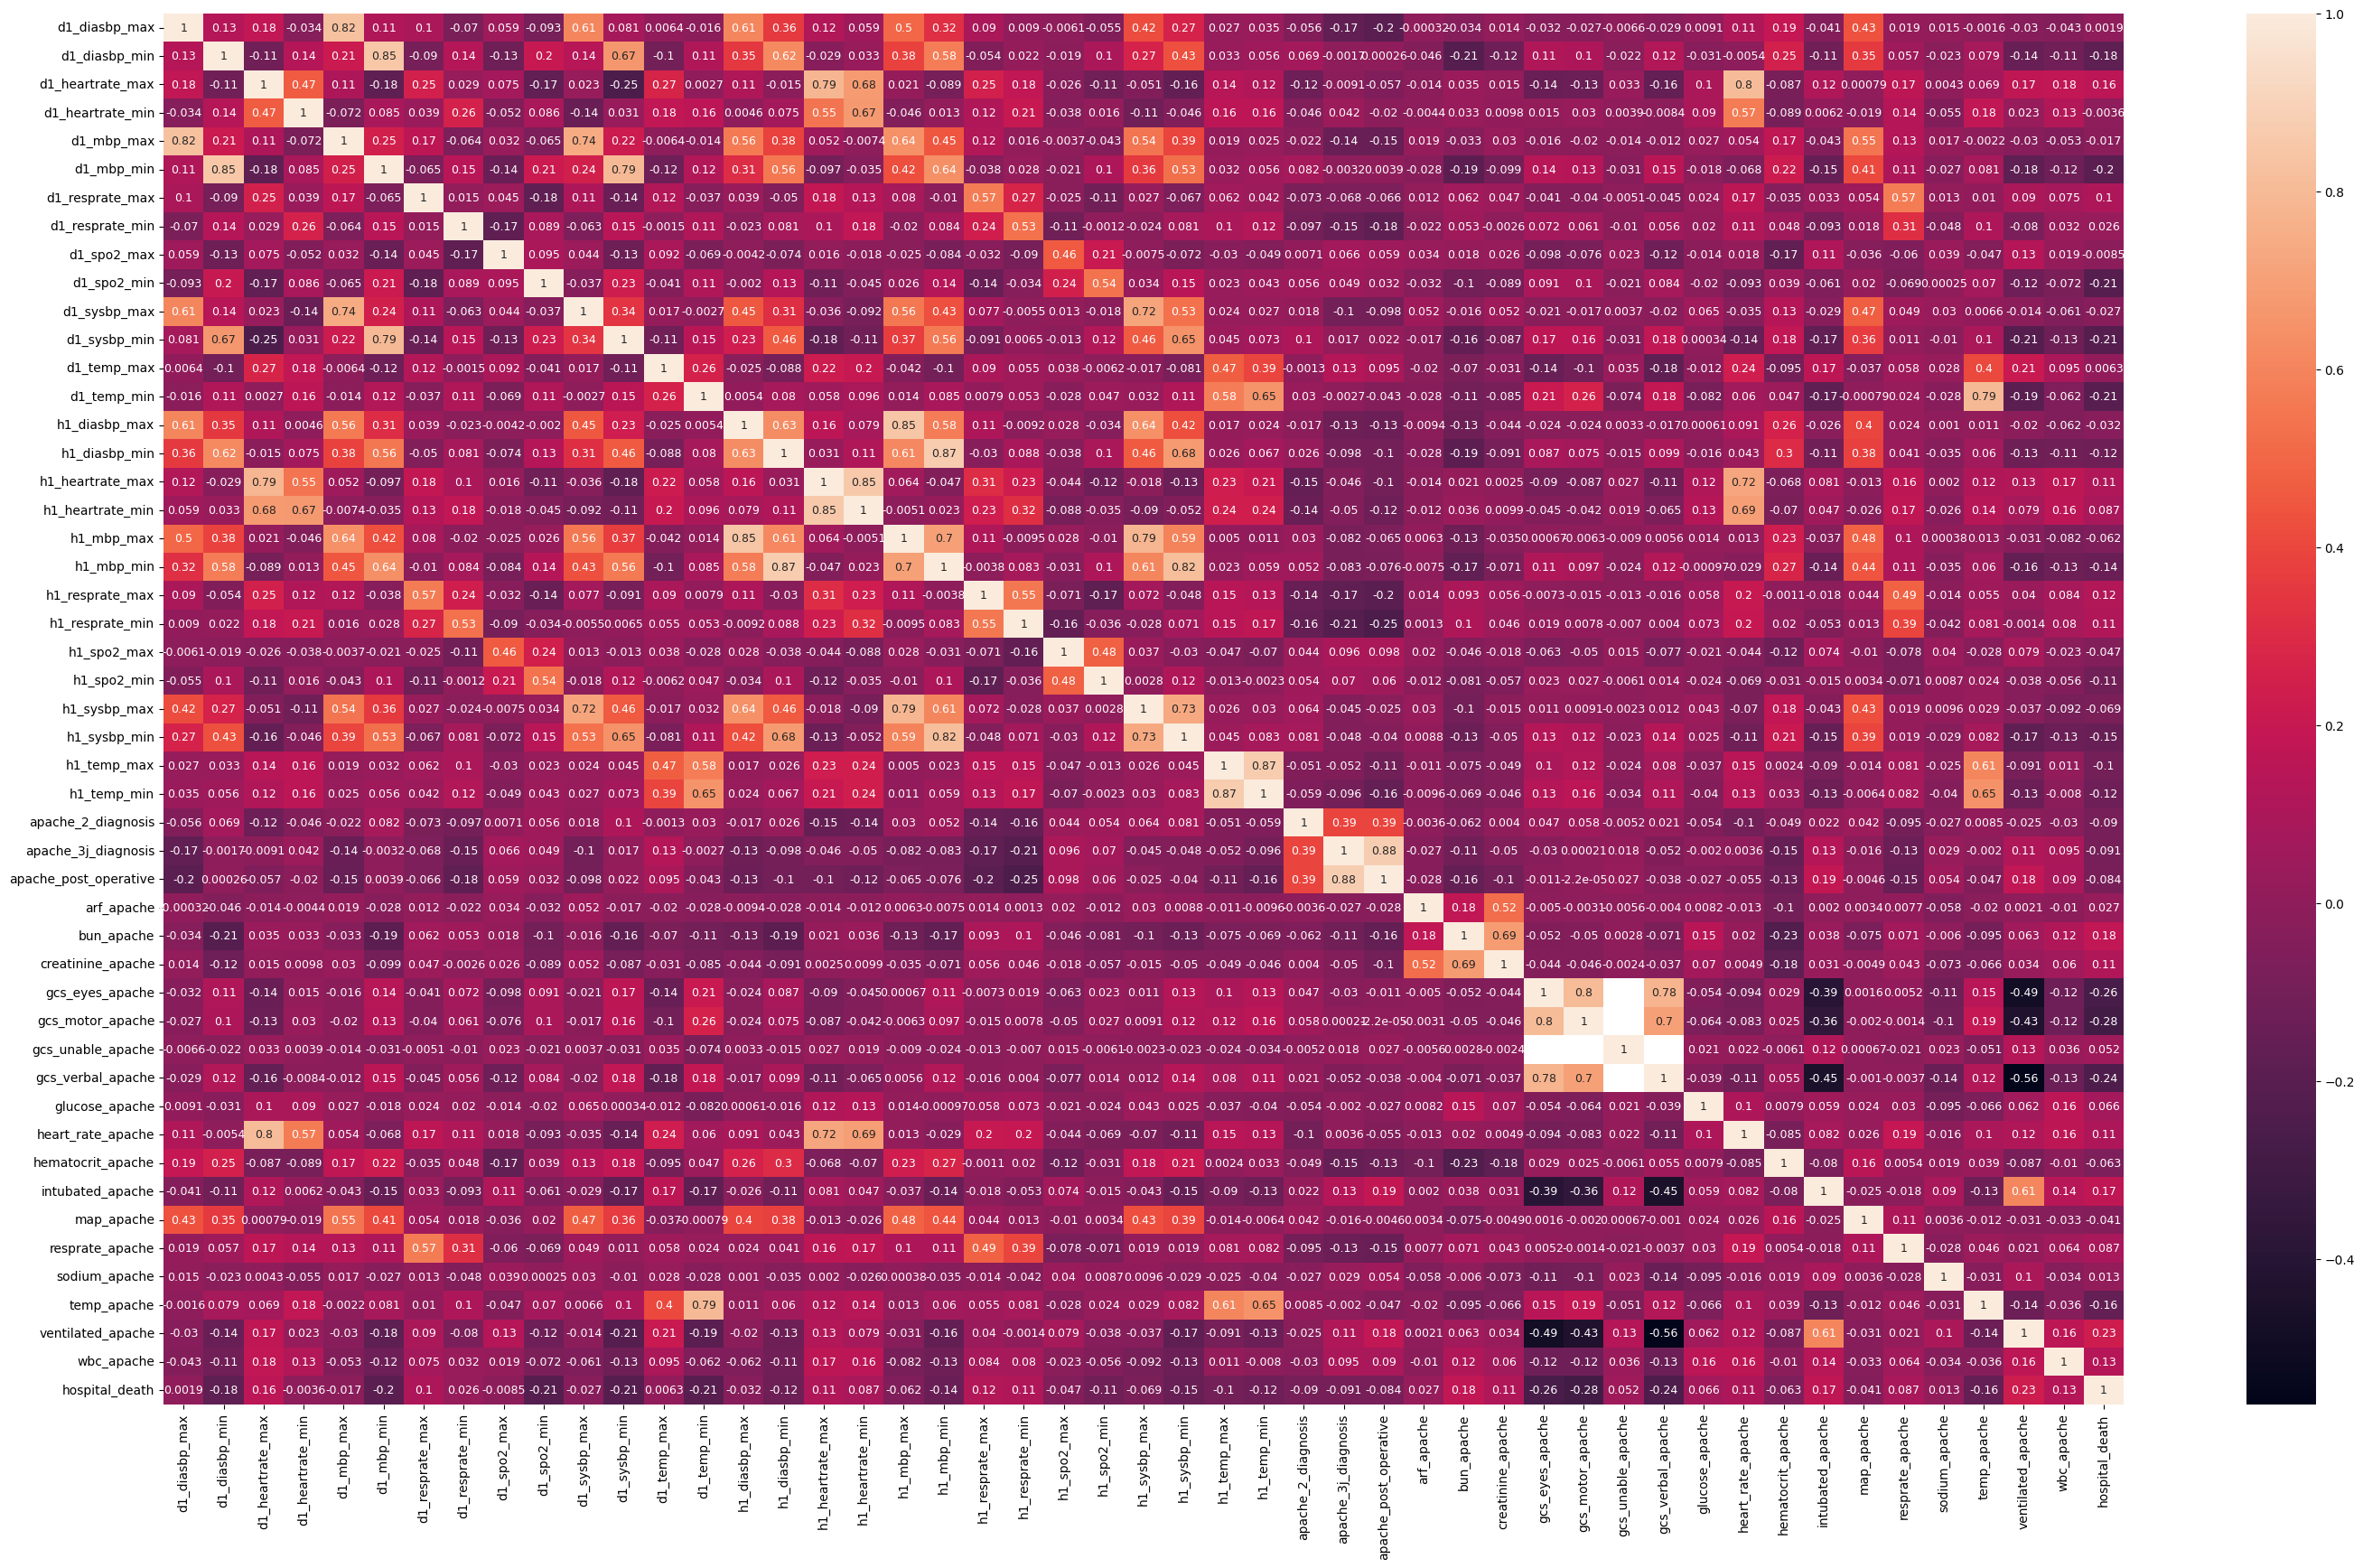

In [ ]:
# Vitals + APACHE Covariates
# Plot heatmap
plt.figure(figsize = (35,20))
sns.heatmap(data[vitals_columns + apache_cov_columns + [target_column]].corr(), annot = True, annot_kws = {"fontsize":9})

<Axes: >

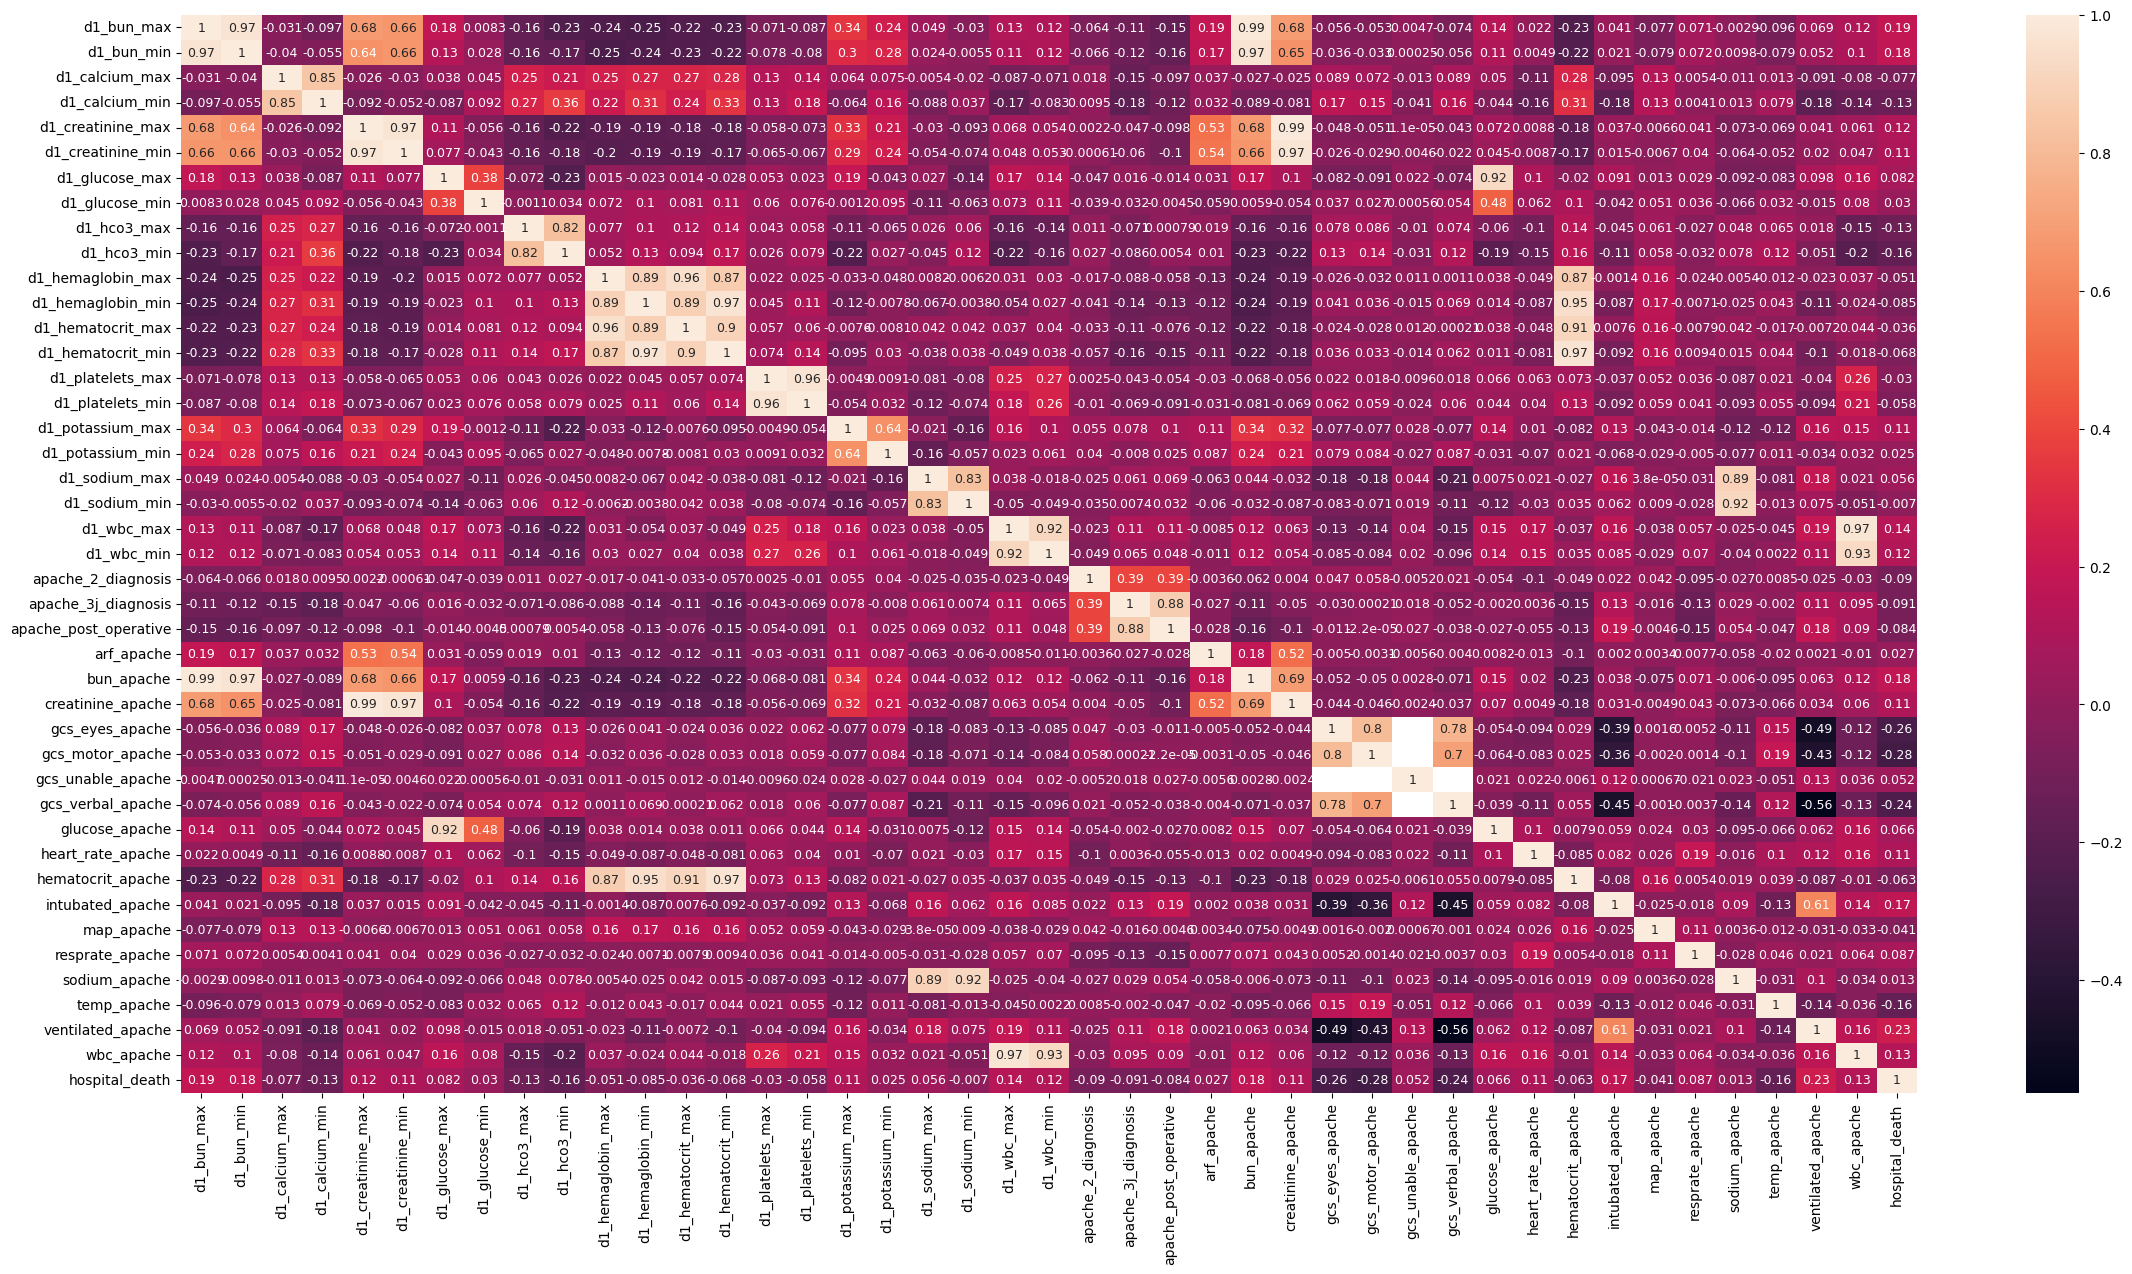

In [ ]:
# Labs + APACHE Covariates
# Plot heatmap
plt.figure(figsize = (28,14))
sns.heatmap(data[labs_columns + apache_cov_columns + [target_column]].corr(), annot = True, annot_kws = {"fontsize":9})

<Axes: >

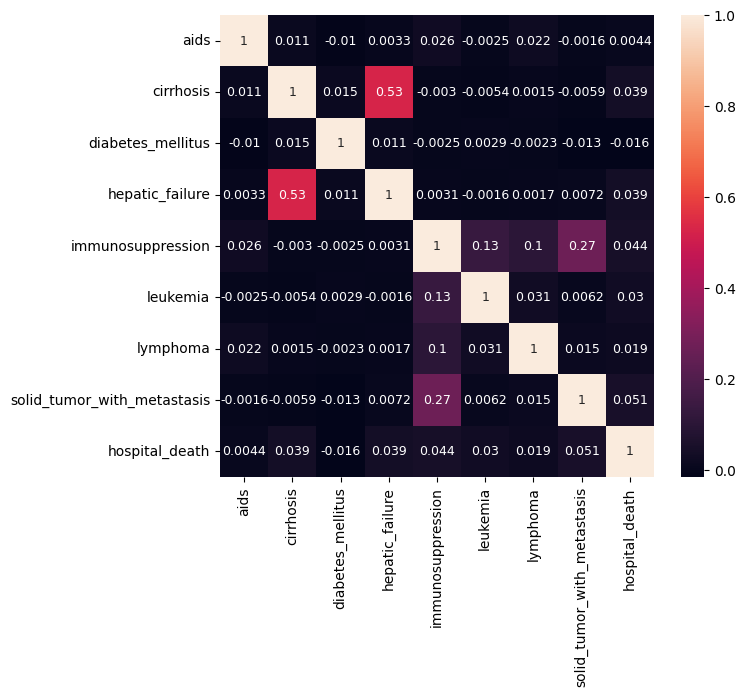

In [ ]:
# APACHE comorbidity
# Plot heatmap
plt.figure(figsize = (7,6))
sns.heatmap(data[apache_comb_columns + [target_column]].corr(), annot = True, annot_kws = {"fontsize":9})

# 3 Machine Learning Pipeline

In [6]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report

In [7]:
# Define pipelines for numerical and categorical features

# Numerical pipeline
#   1.  Implement simple imputaiton ('median') for missing values
#   2.  Scale values using StandardScaler
numerical_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
#   1.  Implement simple imputation ('most_frequent') for missing values
#   2.  One-hot encode categorical features
categorical_pipeline = Pipeline(steps = [
    ('imupter', SimpleImputer(strategy = 'most_frequent')),
    ('one-hot', OneHotEncoder())
])

In [8]:
# Define pipeline to transform numerical and categorical feature columns with respective pipelines
column_transform = ColumnTransformer(transformers = [
    ('numerical_pipeline', numerical_pipeline, numerical_columns),
    ('categorical_pipeline', categorical_pipeline, categorical_columns)
],
                                     remainder = 'passthrough',
                                     n_jobs = -1
                                     )

In [9]:
# Define machine learning models
clf1 = LogisticRegression(max_iter = 1000, random_state = 42)
clf2 = MultinomialNB()
clf3 = DecisionTreeClassifier(random_state = 42)
clf4 = RandomForestClassifier(random_state = 42)
clf5 = GradientBoostingClassifier(random_state = 42)

In [10]:
# Define hyperparameters for each machine learning model
param1 = {}
param1['classifier__C'] = np.logspace(-4, 4, 20)
param1['classifier__penalty'] = ['l1', 'l2']
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__alpha'] = [0.1, 1, 10, 100]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__max_depth'] = [5, 10, 15, 20, 25, 30, 35]
param3['classifier__min_samples_leaf'] = [5, 10, 15, 20, 25]
param3['classifier__splitter'] = ['best', 'random']
param3['classifier__max_features'] = ['sqrt', 'log2']
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__n_estimators'] = [10, 50, 100, 200]
param4['classifier__max_depth'] = [5, 10, 15]
param4['classifier__min_samples_leaf'] = [15, 20, 25]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_estimators'] = [10, 50, 100, 200]
param5['classifier__max_depth'] = [1, 5, 15]
param5['classifier__min_samples_leaf'] = [25]
param5['classifier__learning_rate'] = [.1,  .2]
param5['classifier'] = [clf5]

In [11]:
# Define sampling strategies
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, SMOTENC

undersample = RandomUnderSampler(sampling_strategy = 0.5)
oversample = SMOTE(sampling_strategy = 1)
#oversample = SMOTENC(sampling_strategy = 1, categorical_features = np.linspace(len(numerical_columns), len(numerical_columns) + len(categorical_columns), len(categorical_columns), endpoint = True, dtype = int).tolist())

In [12]:
# Define model pipeline
pipeline = Pipeline(steps = [
    ('column_transform', column_transform),
    ('undersample', undersample),
    ('oversample', oversample),
    ('classifier', clf1)
])
params = [param1, param2, param3, param4, param5]

In [13]:
# Display model pipeline
set_config(display = 'diagram')
display(pipeline)

Pipeline(steps=[('column_transform',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi',
                                                   'pre_icu_los_days',
                                                   'map_apache',
                                                   'resprate_apache',
                                                   'd1_diasbp_max',
                                                   'd1_diasbp_min',
                                                   'd1_heartrate_max',
                                                   'd1_heartrate_min',
                                                   'd...
                                                   'gcs_unable_apache',
                                                   'intubated_apache',
                                                   'ventilated_apache', 'aids',
                                                   'cirrhosis',
                                                   'diabetes_mellitus',
                                                   'hepatic_failure',
                                                   'immunosuppression',
                                                   'leukemia', 'lymphoma',
                                                   'solid_tumor_with_metastasis'])])),
                ('undersample', RandomUnderSampler(sampling_strategy=0.5)),
                ('oversample', SMOTE(sampling_strategy=1)),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [14]:
# Prepare data
data_x = data[numerical_columns + categorical_columns]
data_y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state = 11)

In [15]:
# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
skf = StratifiedKFold(n_splits = 5)

# Initiate grid search using AUC ROC scoring as tuning metric
cv = GridSearchCV(pipeline, params, cv = skf, scoring = 'roc_auc')

In [ ]:
# Fit to training set
cv.fit(X_train, y_train)

# Predict the labels of the test set to y_pred
y_pred = cv.predict(X_test)

# Plotting the confusion matrix for the best tuned model against testing data
classes = data['hospital_death'].unique()
sns.heatmap(confusion_matrix(y_test, y_pred, labels = classes), annot = True,
            xticklabels = classes, yticklabels = classes, cmap = 'Reds',
            fmt = 'g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Confusion Matrix'
plt.title(title)

plt.show()

# Compute and print metrics
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print("AUC ROC: {}".format(cv.best_score_))

# In-depth results per test split in 5-SKF CV grid search
results = pd.DataFrame(cv.cv_results_)
results[results['rank_test_score'] == 1]

results
results.to_csv("cv_results.csv")

# 4 Neural Networks Pipeline

In [103]:
# Import PyTorch library
import torch as t
import torch.nn as nn
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam

# Import PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

In [68]:
# Define pipelines for numerical and categorical features

# Numerical pipeline
#   1.  Implement simple imputaiton ('median') for missing values
#   2.  Scale values using StandardScaler
numerical_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
#   1.  Implement simple imputation ('most_frequent') for missing values
#   2.  One-hot encode categorical features
categorical_imp_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent'))
])

categorical_enc_pipeline = Pipeline(steps = [
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
])

In [69]:
# Define pipeline to transform categorical feature columns with respective pipelines
categorical_imp_transform = ColumnTransformer(transformers = [
    ('categorical_pipeline', categorical_imp_pipeline, categorical_columns)
],
                                     remainder = 'passthrough',
                                     verbose_feature_names_out = False,
                                     n_jobs = -1
                                     )

categorical_enc_transform = ColumnTransformer(transformers = [
    ('categorical_pipeline', categorical_enc_pipeline, categorical_columns)
],
                                     remainder = 'passthrough',
                                     verbose_feature_names_out = False,
                                     n_jobs = -1
                                     )

# Define pipeline to transform numerical feature columns with respective pipelines
numerical_transform = ColumnTransformer(transformers = [
    ('numerical_pipeline', numerical_pipeline, numerical_columns)
],
                                     remainder = 'passthrough',
                                     verbose_feature_names_out = False,
                                     n_jobs = -1
                                     )

In [106]:
# Prepare data
data_x = data[numerical_columns + categorical_columns]
data_y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state = 11)

# Transform training and testing data separately
categorical_imp_transform.fit(X_train)
X_train = pd.DataFrame(categorical_imp_transform.transform(X_train), columns = categorical_imp_transform.get_feature_names_out())

categorical_imp_transform.fit(X_test)
X_test = pd.DataFrame(categorical_imp_transform.transform(X_test), columns = categorical_imp_transform.get_feature_names_out())

categorical_enc_transform.fit(X_train)
X_train = pd.DataFrame(categorical_enc_transform.transform(X_train), columns = categorical_enc_transform.get_feature_names_out())
X_test = pd.DataFrame(categorical_enc_transform.transform(X_test), columns = categorical_enc_transform.get_feature_names_out())

numerical_transform.fit(X_train)
X_train = pd.DataFrame(numerical_transform.transform(X_train), columns = numerical_transform.get_feature_names_out())

numerical_transform.fit(X_test)
X_test = pd.DataFrame(numerical_transform.transform(X_test), columns = numerical_transform.get_feature_names_out())

# Resample training data
X_train, y_train = undersample.fit_resample(X_train, y_train)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [131]:
# Change dtype to float
y_train_fl = y_train.astype(float)
y_test_fl = y_test.astype(float)

X_train_fl = X_train.astype(float)
X_test_fl = X_test.astype(float)

In [159]:
# Extract 'hospital_death' as the target variable for training and testing
y_train_np = np.array(y_train_fl, dtype=np.float32)
y_test_np = np.array(y_test_fl, dtype=np.float32)

# Extract features for training and testing
X_train_np = np.array(X_train_fl, dtype=np.float32)
X_test_np = np.array(X_test_fl, dtype=np.float32)

In [139]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 5
hidden_units_layer_2 = 5

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((541, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

In [140]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

In [141]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train_np).type(t.float32)
Y = t.Tensor(y_train_np).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 500
learning_rate = 0.01
batch_size = 32

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss functio(Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [148]:
# Regularization
# Deep neural networks are prone to overfitting if there is not much data available during training

# Define hyperparameters
number_of_input_features = 541
number_of_hidden_units = 5
epochs = 1000
learning_rate = 0.001
landa = 0.01  # Regularization term (lambda)
dropout_probablity = 0.6  # Probability of dropping out a neuron in dropout layer

# Prepare the data
X_train_tensor = t.Tensor(X_train_np).type(t.float32)
Y_train_tensor = t.Tensor(y_train_np).type(t.float32)

X_test_tensor = t.Tensor(X_test_np).type(t.float32)
Y_test_tensor = t.Tensor(y_test_np).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/1000 ---> Train Accuracy: 0.7923132181167603, Validation Accuracy: 0.7883622646331787
Epoch 1/1000 ---> Train Accuracy: 0.7970949411392212, Validation Accuracy: 0.7591044306755066
Epoch 2/1000 ---> Train Accuracy: 0.7934861183166504, Validation Accuracy: 0.7772043347358704
Epoch 3/1000 ---> Train Accuracy: 0.7947040796279907, Validation Accuracy: 0.8084974884986877
Epoch 4/1000 ---> Train Accuracy: 0.7945687770843506, Validation Accuracy: 0.7662644386291504
Epoch 5/1000 ---> Train Accuracy: 0.7946138381958008, Validation Accuracy: 0.7883622646331787
Epoch 6/1000 ---> Train Accuracy: 0.7934409976005554, Validation Accuracy: 0.7755687832832336
Epoch 7/1000 ---> Train Accuracy: 0.7988091111183167, Validation Accuracy: 0.7714981436729431
Epoch 8/1000 ---> Train Accuracy: 0.7940725088119507, Validation Accuracy: 0.7951588034629822
Epoch 9/1000 ---> Train Accuracy: 0.795335590839386, Validation Accuracy: 0.7848004698753357
Epoch 10/1000 ---> Train Accuracy: 0.7946589589118958, Valida

(0.65, 0.85)

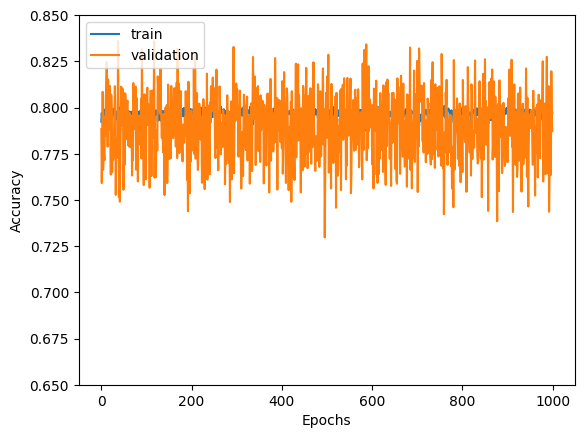

In [154]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.650,0.85)

Text(0, 0.5, 'Loss')

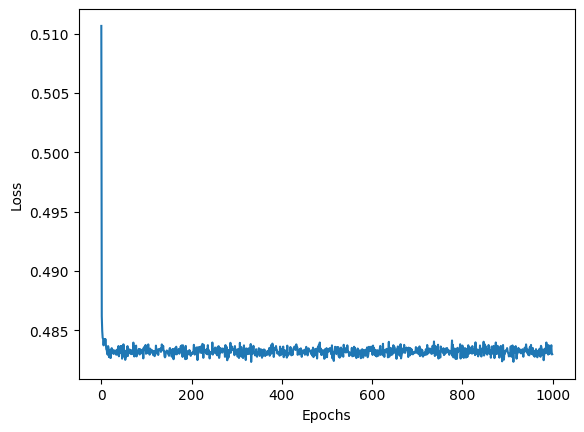

In [155]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [160]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test_np).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(y_test_np).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train_np).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(y_train_np).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

0.818760871887207
0.9521631598472595
